fonte: https://docs.scipy.org/doc/scipy/reference/tutorial/index.html

In [10]:
import numpy as np
from scipy import linalg, optimize
import scipy.integrate as si
import matplotlib.pyplot as plt

In [7]:
help(si.odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

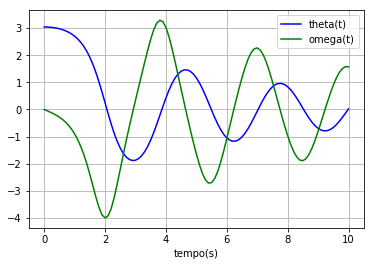

In [23]:

#theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
"""    
where `b` and `c` are positive constants, and a prime (') denotes a
derivative.  To solve this equation with `odeint`, we must first convert
it to a system of first order equations.  By defining the angular
velocity ``omega(t) = theta'(t)``, we obtain the system::

    
        theta'(t) = omega(t)
        omega'(t) = -b*omega(t) - c*sin(theta(t))
"""
def pend(y, t, b, c):
    
    #Theta and Omega
    O, W = y
    dOdt = W
    dWdt = -b*W - c*np.sin(O)
    return ([dOdt,dWdt])
  
b = 0.25
c = 5.0

#Condições Iniciais
O0 = np.pi - 0.1
W0 = 0
y0 = [O0,W0]

#Tempo
t = np.linspace(0, 10, 101)

S = si.odeint(pend, y0, t, args=(b, c))

plt.plot(t, S[:, 0], 'b', label='theta(t)')
plt.plot(t, S[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('tempo(s)')
plt.grid()
plt.show()

In [9]:
# Idem ao Help
np.info(si.odeint)

 odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None,
        mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0,
        ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0,
        tfirst=False)

Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the function `scipy.integrate.solve_ivp`.  To use a function with
          the signature ``func(t, y